## Solutions Q27 - 34

In [1]:
# added here as used later on
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()                      # allows printing of SymPy results in typeset maths format
plt.rcParams.update({'font.size': 16})  # set font size for plots

### Q27 answer 
The function is shown in the next figure. Its integral is expected to be small because there is almost as much positive as negative area. Start by calculating the series to see if a summation formula is obvious, which it appears not to be,

In [2]:
x = symbols('x')
series(exp(-x)*(3*x**2-x**3),x,n=10)

The numerical result based on the series expansion produces a poor result up to $x = 20$, most probably due to numerical precision /rounding errors in adding and subtracting large powers of $x$. The answer to smaller $x$ values is more accurate but large numbers of terms are needed as shown in the list below the next figure. 

First few terms of series 3*z**2 - 4*z**3 + 5*z**4/2 - 


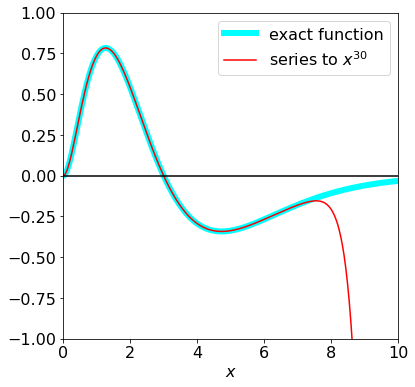

exact integral 0 to  10.000000  is 0.045400
calculating series to limit 30 to 45 and integral values


[30, -24.2885755359146]
[32, -2.79964605253321]
[34, -0.245783464963722]
[36, 0.0190922544560026]
[38, 0.0432862371462572]
[40, 0.0452479140456348]
[42, 0.0453900855458111]
[44, 0.0453993503120927]
[46, 0.0453998981399927]


In [3]:
# **** The very last part of this calculation may be v slow ****
# because the integration is first done algebraically.

fig = plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 16})  # set font size for plots

z   = symbols('z')
sfunc = exp(-z)*(3*z**2 - z**3)           # SymPy function
func = lambdify(z,sfunc,'numpy')            # make SymPy result into numpy function

s0   = series(sfunc,z,0,n = 30)             # series(function name, variable, start, n= power )
print('{:s} {:s}'.format('First few terms of series', str(s0)[0:29] ) )

smax = 30                                 # repeat for numberical calc, maximum power of z
s   = series(s0,z,0,n = smax).removeO()  # remove 'big O' from result
aseries = lambdify(z,s,'numpy')           # make SymPy result into numpy function
numx = 200                                # maximum numbe rof x values
maxx = 10.0                               # max x 
x = np.linspace(0, maxx, numx )


plt.plot(x,func(x),color='cyan',label='exact function',linewidth=6 )
plt.plot(x,aseries(x),color='red',label='series to '+r'$x^{30}$')
plt.axhline(0,color='black')
plt.axis([0, maxx, -1, 1])
plt.xlabel(r'$x$')
plt.legend()
plt.show()

a_int = integrate(sfunc,(z, 0.0, maxx) )   # SymPy symbolic integration

print('{:s} {:f} {:s}{:8.5g}'.format('exact integral 0 to ' ,maxx,' is ', a_int) )

print('calculating series to limit 30 to 45 and integral values')
ans = []
for i in range(30,48,2):
    s = series(sfunc,z,0,n = i).removeO()   # make series to max z**i, i.e. z**35, 36 etc
    s_int = integrate(s,(z,0.0,maxx ) )   # numerically integrate series from 0 to maxxx
    ans.append([i,s_int])                     # make list just to print in one go

for i in range(len(ans)):
    print('{:s}'.format( str(ans[i]) )  )           

Figure 26. The area under the curve from zero to 20 is close to zero.
____
In practice, although this method can be used for numerical integration, it is very slow and it is better to use more standard methods such as Simpson's rule or any of a number of related routines; Chapter 11. 

### Q28 answer
The function is $\displaystyle f(x) = (a + x)^{1/2}$ then follow the derivation given in equation (15), which is

$$\displaystyle f(x)= f(0)+x\left( \frac{df}{dx} \right)_0 + \frac{x^2}{2!}\left( \frac{d^2f}{dx^2} \right)_0  + \frac{x^n}{n!}\left( \frac{d^nf}{dx^n} \right)_0 + \cdots $$

The first three terms are

$$\displaystyle f(0)=a^{1/2},\qquad x\left( \frac{df}{dx} \right)_0 = \frac{x}{\sqrt{a}} ,\qquad  \frac{x^2}{2!}\left( \frac{d^2f}{dx^2} \right)_0= -\frac{x^2}{8\sqrt{a}}  $$ 

and the series should be extended to  five terms. The values of $a$ and $x$ can be chosen freely but the arithmetic is simpler if $a = 4$ and $x = 1$ which gives $\sqrt{5} = 2 + 1/4 - 1/64 + 1/512 - 5/(128 \times 27) = 2.2360$  which is accurate to three decimal places.

### Q29 answer 
Rewriting the factorial as a summation and using equation (27) or (28).

$$\displaystyle \ln(n!)=\sum_{k=1}^n \ln(k)= \int_1^ndx+\frac{\ln(n)+\ln(1)}{2}+\frac{1/n-1}{2}-\frac{2/n^3-2}{720} +\cdots \\= n\ln(n)-n+1+\frac{\ln(2)}{2}+\frac{1}{12n}-\frac{1}{12}-\frac{1}{360n^2}+\frac{1}{360}-\cdots$$

which can be further approximated when $n \gg 1$ because the terms in $n^{-1},\, n^{-3}$, and so forth are going to be small, as are the constants. The result is

$$\displaystyle \ln(n!) \approx n \ln(n) - n + \ln(n)/2$$

which can be further approximated to Stirling's formula, 

$$\displaystyle \ln(n!) \approx n \ln(n) - n$$

because $\ln(n)/2 \ll n$ when $n$ is large. Plotting the approximation $\ln(n!) \approx n\ln(n) - n + \ln(n)/2 + 1$ shows that this is surprisingly accurate for almost all $n$ and $\ln(n!) \approx n \ln(n) - n$  down to about $n = 10$. The gamma function describes factorials of real positive and negative numbers not just positive integers.


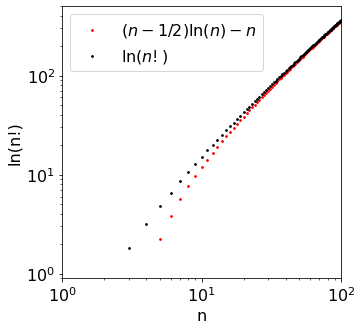

In [4]:
#--------------------
def fact(n):              # will overflow if n is too large > 100
    if n == 0 or n == 1:
        return 1
    else:
        return n * fact(n-1)
#--------------------
bfact = lambda n: (n - 0.5)*np.log(n) - n

maxn = 100
n = np.linspace(1,maxn,maxn)
afact = [np.log(fact(n[i])) for i in range(maxn)]    

fig1 = plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size': 16})  # set font size for plots

plt.scatter(n,bfact(n),s=3,label=r'$(n-1/2)\ln(n)-n$',color='red')
plt.scatter(n[0:100],afact,s=3,label=r'$\ln(n!)$',color='black')
plt.yscale('log')
plt.xscale('log')
plt.axis([1,100,0.9,500])
plt.xlabel('n')
plt.ylabel('ln(n!)')
plt.legend()
plt.show()

Figure 27. Log of the factorial function (upper line) and log of Stirling's approximation, which is accurate only at large $n$.
____
### Q30 answer
(a) The rotational energy is $E_J = BJ(J + 1)$ and the partition function accounting for the 2$J$ + 1 multiplicity
of the levels is 

$$\displaystyle Z = \sum\limits_{J=0}^\infty (2J + 1)e^{−BJ(J+1)/k_BT}$$

where the summation goes as far as is necessary to make the function converge; infinity is rarely needed! When the rotational constant $B$ is small, the energy levels are closely spaced and the integral of $Z$ approximates better to the summation than when $B$ is large. As $B$ is inversely proportional to the reduced mass of the molecule, $B = \hbar^2/2\mu r_e^2$ , and to the equilibrium bond length squared, both of which are large in $\mathrm{I_2}$ compared to HD, hence the approximation is poor for HD.

(b) The Euler–Maclaurin formula is going to require then evaluation of the integral 

$$\displaystyle \int\limits_{J=0}^\infty (2J+1)e^{-BJ(J+1)/k_BT}dJ$$ 

and the first, third, and possibly the fifth derivatives with respect to $J$. The integral can clearly be performed by splitting it into two terms; the result is

$$\displaystyle \int\limits_{J=0}^\infty (2J+1)e^{-BJ(J+1)/k_BT}dJ =- \left. \frac{k_BT}{B} e^{-BJ(J+1)/k_BT}  \right|_{J=0}^\infty =\frac{k_BT}{B}$$

because the exponential is zero when $J$ is infinity and unity when $J$ is zero. The partition function is proportional to the reduced mass $\mu$ (in kg) and bond length squared because the rotational constant, more properly labelled $B_e$ since it reflects the value at the equilibrium bond length, is $B_e=\hbar/(4\pi c\mu r_e^2)\, \mathrm{cm^{-1}}$ where $c$ is the speed of light in cm/s. 

The value for HD is $B_e = 45.655\,\mathrm{ cm^{-1}}$ and for $\mathrm{I_2}$ is  $0.03735 \,\mathrm{ cm^{-1}}$. At $30$ K the partition function for HD calculated as an integral is $0.695 \times 30/45.655 = 0.457$ and is $4.57$ at $300$ K. The values for $\mathrm{I_2}$ are $556.6$ and $5566$ at the same two temperatures. The partition function for HD at $30$ K calculated properly as a summation is $1.037$. The calculation is

In [5]:
B   = 45.655                # cm^(-1)
k_B = 1.38e-23 *5.034e22    # cm^(-1)
T   = 30
maxJ= 8
print('{:s}{:g}'.format('exponential term ', np.exp(-B*maxJ*(maxJ+1)/(k_B*T))))
Z   = sum( [(2*J+1)*np.exp(-B*J*(J+1)/(k_B*T)) for J in range(maxJ)] )
print('{:s}{:10.5f}{:s}{:6.3f}{:s}'.format('Z = ',Z,' at ',T, ' K'))

exponential term 3.16109e-69
Z =    1.03754 at 30.000 K


and at $300$ K the partition function is $4.91$ and both are significantly different from the values obtained by integration. This shows that integration produces a systematic error that does not improve as the temperature increases.

The summation for iodine produces $556.96$ at $30$ K and $5566.6$ at $300$ K and now both are very similar to the values from integration as expected, because the rotational quantum is smaller relative to thermal energy than it is in HD.

The higher derivatives are complicated and SymPy is used to evaluate them within the Euler_Maclaurin algorithm given in Chapter 5.7. 

The summation for the partition function starts with $J = 0$, but the Euler-Maclaurin formula with $J = 1$ therefore the first term, which is $1$, has to be added to our result. The calculation is shown next and the three different results plotted. The maximum $J$ used is $8$ as the rotational constant is very large. Smaller values will need far larger maximum values, which can be checked by calculating $\exp(-BJ(J+1)/k_BT)$.

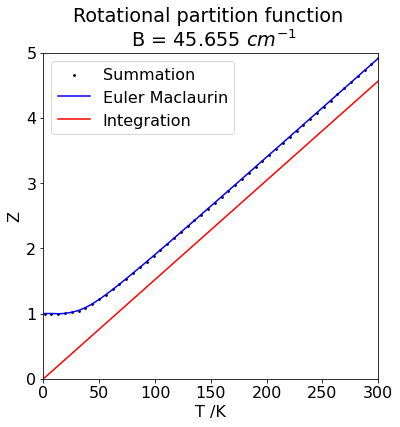

In [6]:
# calculation of rotational partition function by three different methods.
B   = 45.655                # value for HD cm^(-1)
k_B = 1.38e-23 *5.034e22    # cm^(-1)
maxT= 300.0                 # maximum temperature

m = 1
maxJ = 10                   # max J, see previous calculation

k, x, T = symbols('k, x, T')# start to use sympy for Euler-Maclaurin, define symbols

f =  (2*x+1)*exp(-((B*x)/(k_B*T))*(x+1))   # terms in partition function
s1 = integrate(f,(x,m,maxJ))              
s2 = (f.subs({x:maxJ}) + f.subs({x:m}))/2
s3 = 0.0
for i in range(5):                         # form series
    k = i + 1
    s3 = s3 + (bernoulli(2*k)/factorial(2*k))*diff(f,x,2*k-1)  # Euler-Maclaurin terms
    pass
s3n = s3.subs({x:maxJ})
s3m = s3.subs({x:m})

s = s1 + s2 + s3n - s3m                    # Euler Maclaurin result

EM = lambdify(T,s,'numpy')                 # sympy 'trick' to make into a function in T

numT = 50
x = np.linspace(1,maxT,numT)               # numT points is range 1 to maxT
Zem  = [1.0 + EM(x[i]) for i in range(numT)]  # Euler MAclaurin add 1 for zero temp, see text

Zsum = lambda T: sum( [(2*J+1)*np.exp(-B*J*(J+1)/(k_B*T)) for J in range(maxJ)])  # direct sum

Zint = lambda T: k_B*T/B                   # approx value by integration

fig=plt.figure(figsize=(6,6))
plt.rcParams.update({'font.size': 16})  # set font size for plots
plt.scatter(x,Zsum(x),s=3,label='Summation',color='black')
plt.plot(x,Zem,label='Euler Maclaurin',color='blue')
plt.plot(x,Zint(x),label='Integration',color='red')
plt.ylabel('Z')
plt.xlabel('T /K')
plt.title('Rotational partition function \n B = '+str(B)+r' $cm^{-1}$')
plt.ylim([0,5])
plt.xlim([0,maxT])
plt.legend()
plt.show()


Fig. 28 Comparison of the partition function for a rigid rotor calculated using the integral, the summation and Euler–Maclaurin equation. The latter two are virtually identical.
____
### Q31 answer
(a) By convention for any type of energy levels the lowest energy is always the more negative. The energy is $ E_{m_z} = -\gamma \hbar B_zm_z $ so that this is negative with positive $m_z$. The physical reason for there being two energies is that if the spin magnetic moment lies in the same direction as the applied magnetic field ($B_z$ along the $z$ direction), its energy will be lower than if it opposes the field, so $m_z$ must be positive. In some nuclei, for example, $^3H$ and $^{17}O,\, \gamma $ is negative and the order is then inverted.

(b) The number of nuclei (particles) in an upper level $\alpha$ is related by the Boltzmann distribution to those in a lower level $\beta$ by

$$\displaystyle \frac{n_\alpha}{n_\beta}=e^{-\Delta E/k_BT}$$

where $\Delta E$ is the difference in energy between levels which is $\Delta E =E_\alpha-E_\beta=-\gamma \hbar B_z[-1/2-1/2]=\gamma \hbar B_z$ and $m_{z_\alpha}=-1/2,\; m_{z_\beta}=+1/2$. The fractional population is $f=(n_\beta - n_\alpha)/(n_\beta + n_\alpha)$ and substituting for $n_\alpha$ produces

$$\displaystyle f=\frac{n_\beta-n_\beta e^{-\Delta E/k_BT}}{n_\beta e^{-\Delta E/k_BT}+n_\beta}=\frac{1- e^{-\Delta E/k_BT}}{1+ e^{-\Delta E/k_BT}}$$

However, is not a very useful result, but as the energy $\Delta E/k_BT$ is small the exponentials can be expanded using  $e^{-x} = 1-x+x^2/2!+\cdots$ to give,

$$\displaystyle f=\frac{\Delta E/k_BT +(\Delta E/k_BT)^2-\cdots}{2-\Delta E/k_BT +(\Delta E/k_BT)^2-\cdots} = \frac{\Delta E}{2k_BT}$$

where, because $\Delta E/k_BT \ll 1$, its square and higher powers are even smaller and can be ignored. In the denominator, because 2 is so much larger than any of the other terms, all these can be ignored. By rearranging and substituting for $\Delta E$, the population difference is found to be,

$$\displaystyle  n_\beta -n_\alpha = \frac{N\gamma \hbar B_z}{2k_BT}$$

### Q32 answer
(a) Hooke’s law states that force is directly proportional to extension; $F = kx$ with force constant $k$. The force is also the derivative of _energy_ with extension.

(b) Differentiating the energy by $x$ produces the force, 

$$\displaystyle F=\frac{dU}{dx}=-T\frac{dS}{dx}-P\frac{dV}{dx}$$

but as the volume is constant, $\displaystyle F=\frac{dU}{dx}=-T\frac{dS}{dx}$.

The constant volume assumption is reasonable because the chain always has the same number and size of segments, therefore, in a real protein, we must suppose that this narrows as its length extends to maintain the same volume.
The derivative of $S$ is most clearly calculated in terms of $\alpha$ rather than $x$ by using the chain rule,

$$\displaystyle \frac{dS}{dx}=\frac{dS}{d\alpha}\frac{d\alpha}{dx}$$

but you can still differentiate directly by substituting first with $x$ if you prefer because $\alpha = x/NL$. As a check,  the differentiation of $dS/d\alpha$ is calculated using sympy

In [7]:
alpha, k_B, N = symbols('alpha, k_B, N')
f01 = (1 + alpha)*ln( 1 + alpha ) + ( 1 - alpha )*ln( 1 - alpha )
ans = (k_B*N/2)*diff(f01,alpha)
ans

and as $d\alpha /dx=1/NL$ then 

$$\displaystyle  \frac{dS}{dx}=\frac{k_B}{2L}[\ln(1+\alpha)-\ln(1-\alpha)]$$

and the force, which has units energy/distance or J/m = N, is 

$$\displaystyle F= \frac{k_BT}{2L}\ln \left ( \frac{1+\alpha}{1-\alpha} \right) $$

At small extension, the log terms in the force can be expanded in $\alpha$ to give

$$\displaystyle F=\frac{k_BT}{2L}\left[\alpha - \alpha^2/2+\cdots  \right] - \frac{k_BT}{2L}\left[-\alpha - \alpha^2/2-\cdots  \right]$$

so that $F = x k_BT/(NL^2)$ which shows that at small extension, $x$, this is linearly proportional to the applied force which is Hooke’s Law. The force constant is $k_BT/(NL^2)$. 

The plot below shows the approximate force equation just derived but plotted as $FL/k_BT$  vs. fractional extension $\alpha$. Plotting this way makes the force dimensionless. The full equation is also plotted and the comparison clearly shows the region where the approximation is valid.

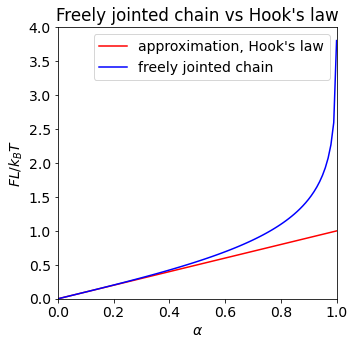

In [8]:
alpha  = np.linspace(0,0.999,100)                                # define set of data points
fapprox= [alpha[i] for i in range(100)]                          # Hook's law
f = [0.5*np.log((1 + alpha[i])/(1 - alpha[i])) for i in range(100)]  # reduced force into array

fig1=plt.figure(figsize=(5,5))
plt.rcParams.update({'font.size': 14})  # set font size for plots
plt.plot(alpha,fapprox,color='red',label="approximation, Hook's law")
plt.plot(alpha,f,color='blue',label='freely jointed chain')
plt.axis([0,1,0,4])
plt.xlabel(r'$ \alpha $')
plt.ylabel(r'$FL/k_BT$')
plt.title("Freely jointed chain vs Hook's law")
plt.legend()
plt.show()

Fig.5.29 'Dimensionless force', $FL/k_BT$ vs fractional extension $\alpha$ (where $\alpha = x/L$) for an 'elastic' protein. The Hooke's law region occurs at small extension where force is linearly proportional to $\alpha$ and is shown as the straight line.
____
As seen in the figure, at low extension Hooke's law is obeyed, but there is huge deviation as the extension increases. At large extension, the force tends to infinity because here the model protein, made up of many segments, has a finite length when all bonds are taut, and we assume that bonds cannot be broken just by pulling on the protein.